**Case Study
This case study is to help to predict whether or not it will rain tomorrow. 
The dataset were drawn from the observations from a single weather station based in Broken Hill Airpot, New South Wales.**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import folium

In [3]:
my_map = folium.Map(location = [-31.997514330714736, 141.47110601161341], zoom_start=12)

my_map.save("my_map.html")
#display(my_map)

tooltip = "Click here for More Info"
marker = folium.Marker(location=[-31.997514330714736, 141.47110601161341],
                       popup="<stong>Here We are</stong>", tooltip=tooltip)
marker.add_to(my_map)
my_map

In [4]:
df = pd.read_csv('weatherBHI.csv')

**Section 1: EDA - Exploring and cleaning the Dataset**

In [5]:
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           408 non-null    object 
 1   MinTemp        408 non-null    float64
 2   MaxTemp        407 non-null    float64
 3   Rainfall       408 non-null    float64
 4   Evaporation    0 non-null      float64
 5   Sunshine       0 non-null      float64
 6   WindGustDir    408 non-null    object 
 7   WindGustSpeed  407 non-null    float64
 8   Temp9am        408 non-null    float64
 9   HumRel9am      408 non-null    int64  
 10  Cloud9am       119 non-null    float64
 11  WindDir9am     408 non-null    object 
 12  WindSpeed9am   408 non-null    object 
 13  Pressure9am    408 non-null    float64
 14  Temp3pm        408 non-null    float64
 15  HumRel3pm      408 non-null    int64  
 16  Cloud3pm       138 non-null    float64
 17  WindDir3pm     408 non-null    object 
 18  WindSpeed3

In [6]:
df.isna().sum() # Looking for missing values.

Date               0
MinTemp            0
MaxTemp            1
Rainfall           0
Evaporation      408
Sunshine         408
WindGustDir        0
WindGustSpeed      1
Temp9am            0
HumRel9am          0
Cloud9am         289
WindDir9am         0
WindSpeed9am       0
Pressure9am        0
Temp3pm            0
HumRel3pm          0
Cloud3pm         270
WindDir3pm         0
WindSpeed3pm       0
RainToday          0
RainTomorrow       0
dtype: int64

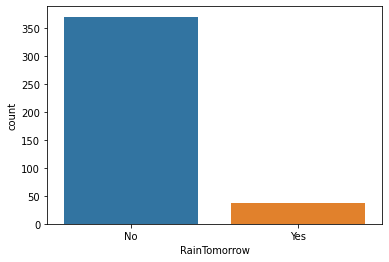

In [7]:
sns.countplot(data = df, x = "RainTomorrow")

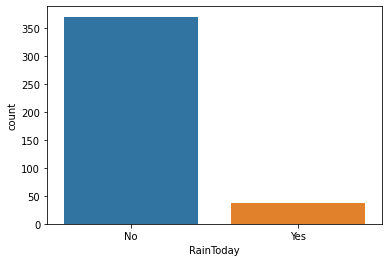

In [8]:
sns.countplot(data = df, x = "RainToday")

**Section 2: Data Preprocessing**

In [9]:
df.drop(['Evaporation', 'Sunshine'], axis=1, inplace=True) # Dropping Evaporation and Sunshine columns since it doesnt have any values. 

In [10]:
df=df.fillna(df.mean()) # Replace NA with the dataset mean

In [11]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,Temp9am,HumRel9am,Cloud9am,WindDir9am,WindSpeed9am,Pressure9am,Temp3pm,HumRel3pm,Cloud3pm,WindDir3pm,WindSpeed3pm,RainToday,RainTomorrow
0,1/7/2020,8.7,22.5,0.0,N,46.0,15.6,28,1.000000,NNW,20,1017.0,22.1,17,1.0,NNW,31,No,No
1,2/7/2020,6.1,15.7,0.0,WSW,50.0,11.0,65,5.571429,WNW,13,1019.6,14.9,37,2.0,W,22,No,No
2,3/7/2020,3.3,16.4,0.0,WSW,50.0,10.3,63,5.571429,W,19,1026.4,15.4,45,6.0,W,31,No,No
3,4/7/2020,3.1,13.2,0.0,S,39.0,8.5,71,7.000000,SSW,22,1031.1,12.4,56,5.0,SSW,28,No,No
4,5/7/2020,7.4,12.2,0.2,S,39.0,9.0,93,8.000000,S,20,1030.9,11.6,61,8.0,SSW,24,No,No


In [12]:
df.RainToday

0      No
1      No
2      No
3      No
4      No
       ..
403    No
404    No
405    No
406    No
407    No
Name: RainToday, Length: 408, dtype: object

In [13]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0}) # converting categorical value to numeric. 
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [16]:
df['RainToday']

0      0
1      0
2      0
3      0
4      0
      ..
403    0
404    0
405    0
406    0
407    0
Name: RainToday, Length: 408, dtype: int64

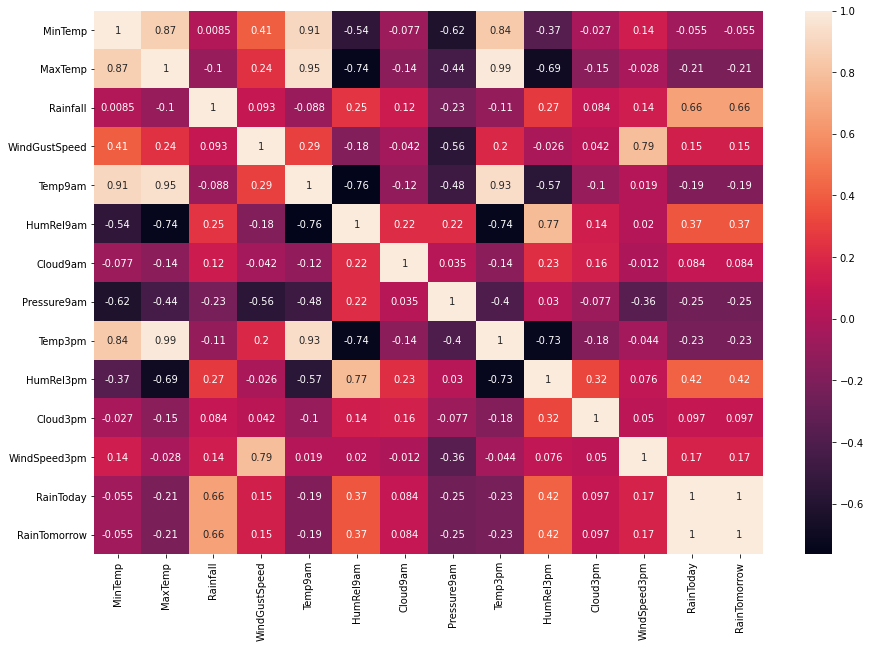

In [17]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True)
plt.show()

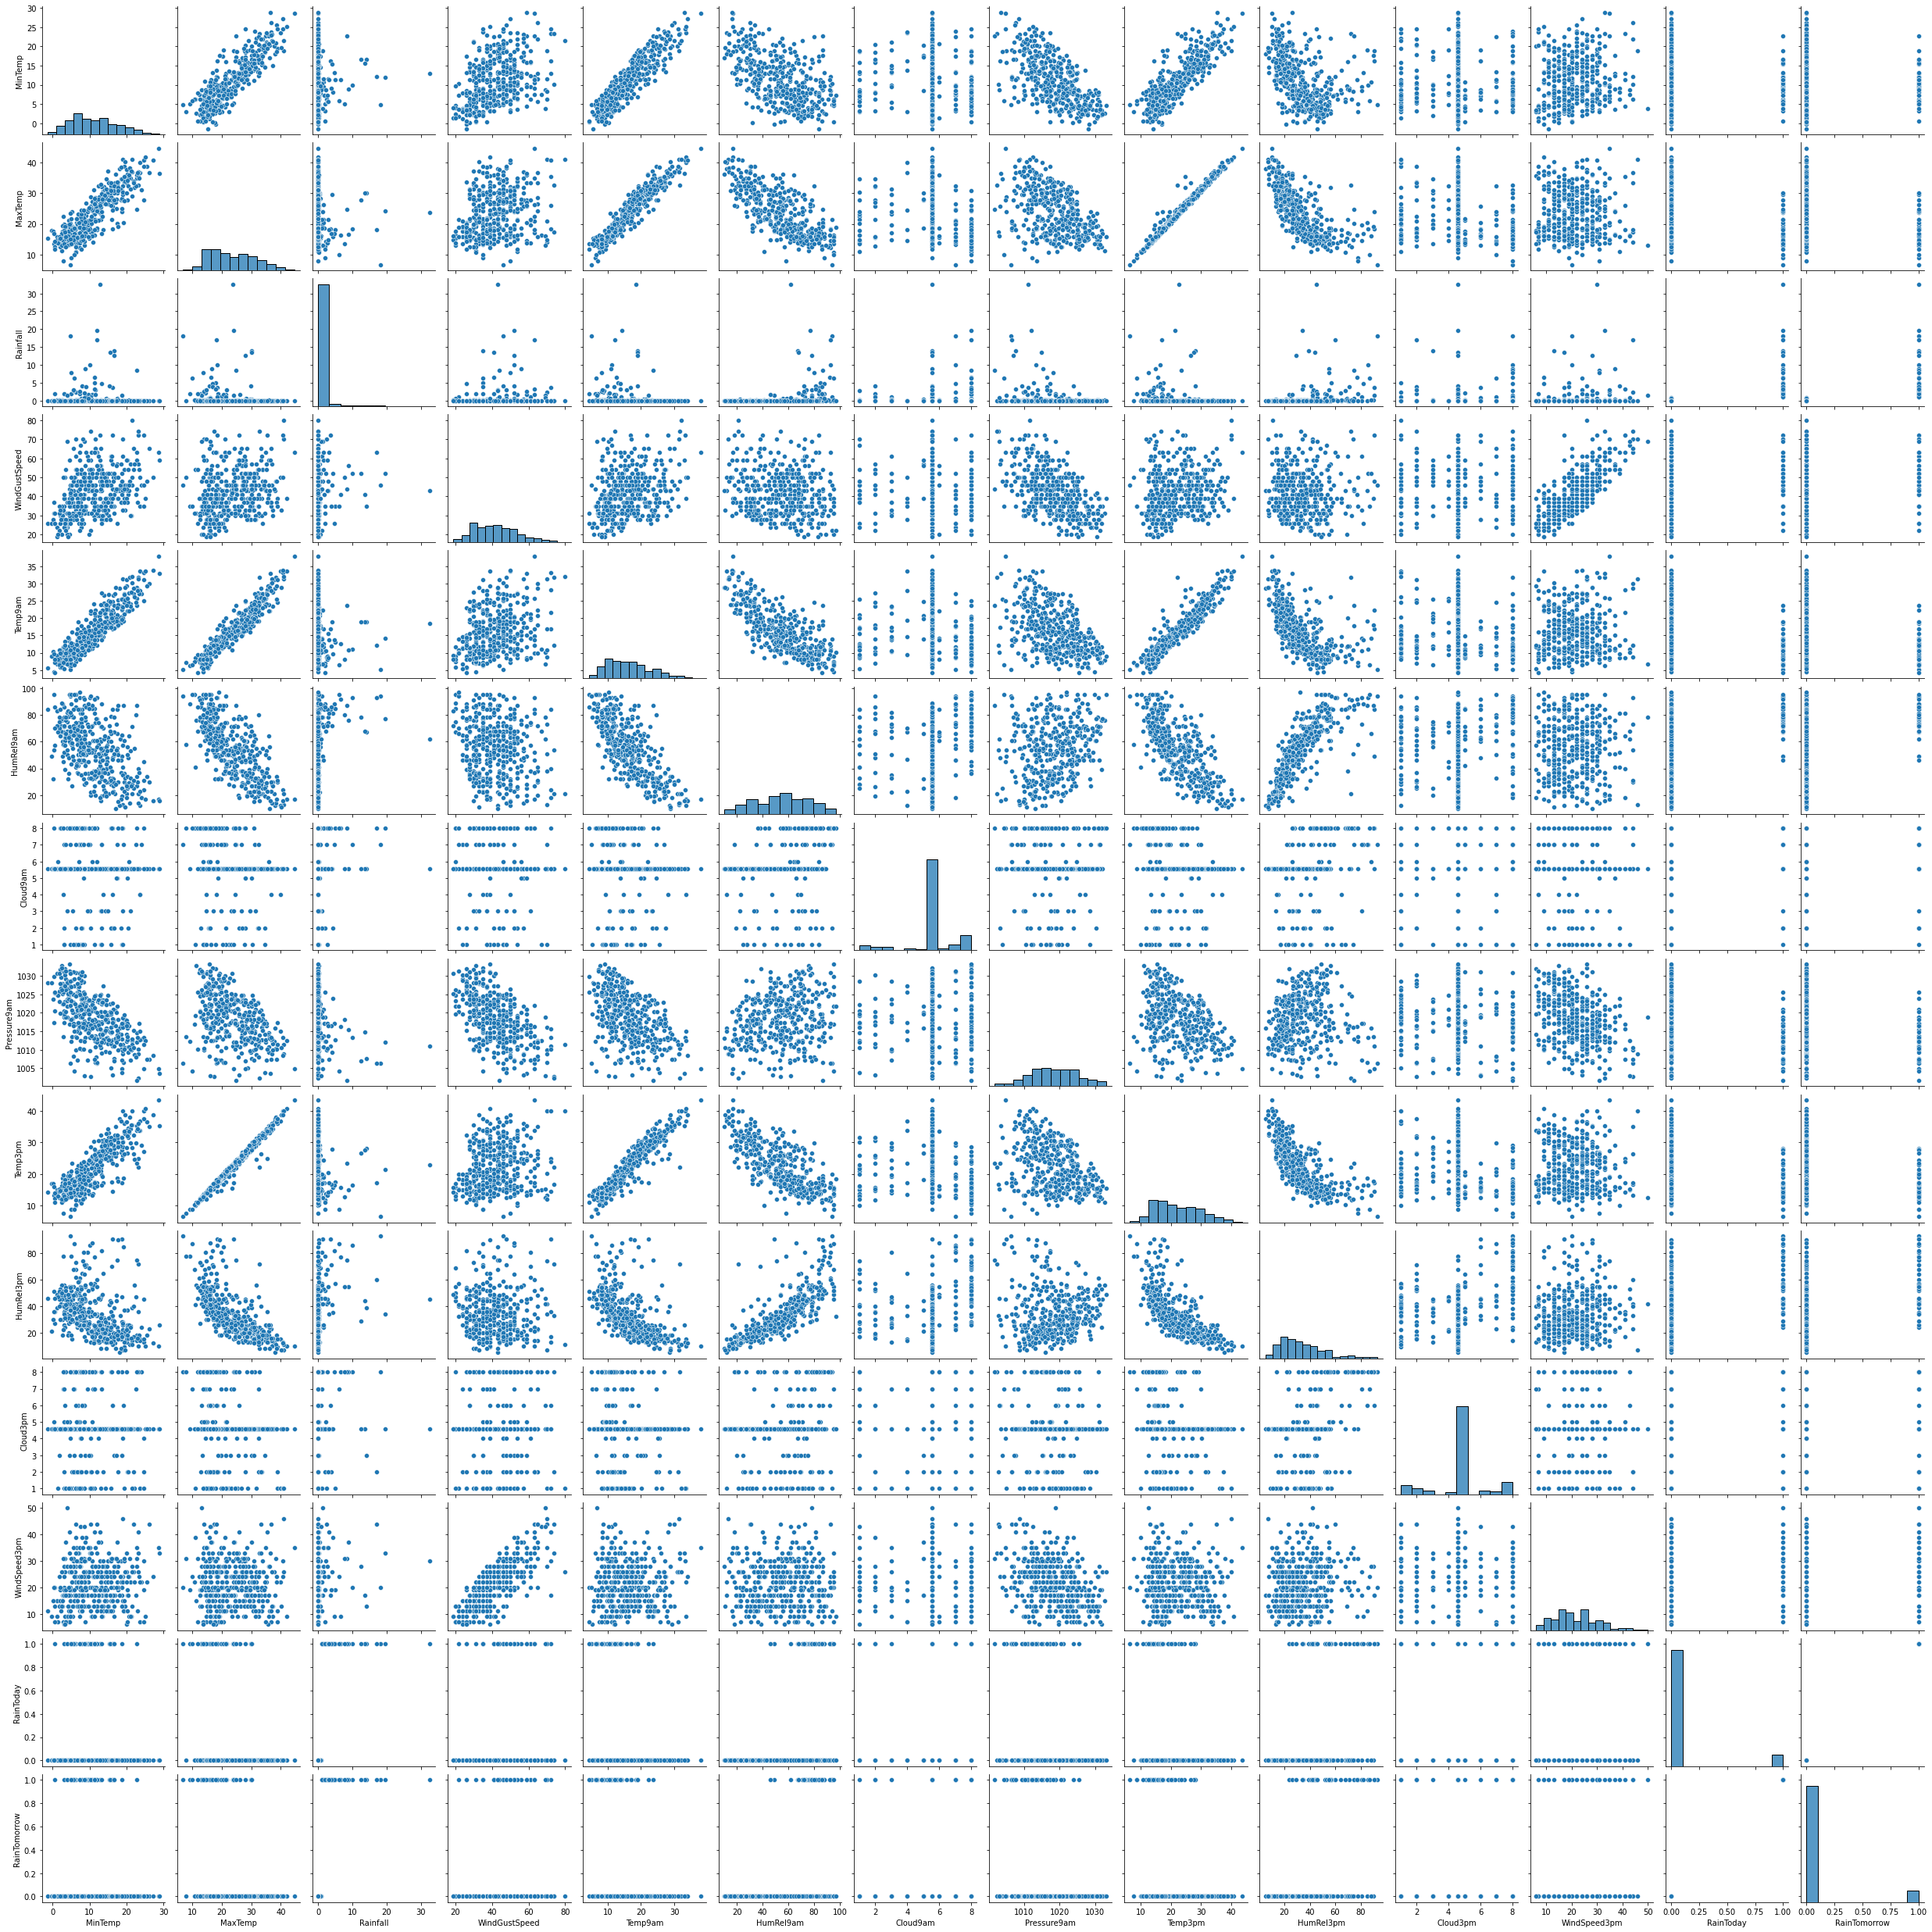

In [18]:
sns.pairplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


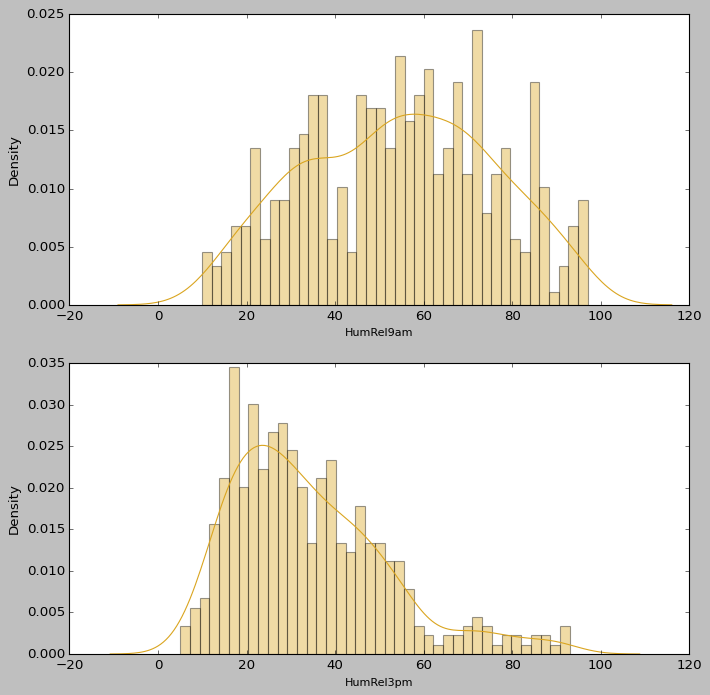

In [20]:
plt.style.use("classic")
fig, ax =plt.subplots(2,1, figsize=(10,10))

sns.distplot(df['HumRel9am'], ax=ax[0], color="goldenrod", bins=40)
ax[0].set_xlabel("HumRel9am",fontsize=10)

sns.distplot(df['HumRel3pm'], ax=ax[1], color="goldenrod", bins=40)
ax[1].set_xlabel("HumRel3pm",fontsize=10);

In [21]:
print(df.corr().nlargest(5,'RainToday').index)
print(df.corr().nlargest(5,'RainToday').values)

Index(['RainToday', 'RainTomorrow', 'Rainfall', 'HumRel3pm', 'HumRel9am'], dtype='object')
[[-0.05545716 -0.21262688  0.66460927  0.14930013 -0.18733781  0.37465045
   0.08352646 -0.25412839 -0.22834116  0.41733548  0.0967896   0.17212094
   1.          1.        ]
 [-0.05545716 -0.21262688  0.66460927  0.14930013 -0.18733781  0.37465045
   0.08352646 -0.25412839 -0.22834116  0.41733548  0.0967896   0.17212094
   1.          1.        ]
 [ 0.00852246 -0.10273903  1.          0.09322773 -0.08762762  0.254082
   0.11979638 -0.22780728 -0.10867303  0.27400631  0.08427017  0.13504849
   0.66460927  0.66460927]
 [-0.36686799 -0.69262215  0.27400631 -0.02628231 -0.56984045  0.77452683
   0.2255971   0.02997322 -0.73061619  1.          0.32198539  0.07584676
   0.41733548  0.41733548]
 [-0.54094214 -0.73844226  0.254082   -0.18004576 -0.76444357  1.
   0.22045635  0.21629829 -0.74205357  0.77452683  0.1435924   0.02046683
   0.37465045  0.37465045]]


In [22]:
le = LabelEncoder() 

df['WindDir9am'] = pd.get_dummies(df['WindDir9am']) # Assigning numerical values.
df['WindSpeed9am'] = pd.get_dummies(df['WindSpeed9am'])
df['WindDir3pm '] = pd.get_dummies(df['WindDir3pm '])
df['WindGustDir '] = pd.get_dummies(df['WindGustDir '])

In [23]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,Temp9am,HumRel9am,Cloud9am,WindDir9am,WindSpeed9am,Pressure9am,Temp3pm,HumRel3pm,Cloud3pm,WindDir3pm,WindSpeed3pm,RainToday,RainTomorrow
0,1/7/2020,8.7,22.5,0.0,0,46.0,15.6,28,1.000000,0,0,1017.0,22.1,17,1.0,0,31,0,0
1,2/7/2020,6.1,15.7,0.0,0,50.0,11.0,65,5.571429,0,0,1019.6,14.9,37,2.0,0,22,0,0
2,3/7/2020,3.3,16.4,0.0,0,50.0,10.3,63,5.571429,0,0,1026.4,15.4,45,6.0,0,31,0,0
3,4/7/2020,3.1,13.2,0.0,0,39.0,8.5,71,7.000000,0,0,1031.1,12.4,56,5.0,0,28,0,0
4,5/7/2020,7.4,12.2,0.2,0,39.0,9.0,93,8.000000,0,0,1030.9,11.6,61,8.0,0,24,0,0


**Section 3: Evaluating**

In [24]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        uint8
WindGustSpeed    float64
Temp9am          float64
HumRel9am          int64
Cloud9am         float64
WindDir9am         uint8
WindSpeed9am       uint8
Pressure9am      float64
Temp3pm          float64
HumRel3pm          int64
Cloud3pm         float64
WindDir3pm         uint8
WindSpeed3pm       int64
RainToday          int64
RainTomorrow       int64
dtype: object

In [28]:
#x = df.drop(columns=['RainTomorrow','Date']) # exclude RainTomorrow, Date from features list.
y = df['RainTomorrow'] # set RainTomorrow as label.

In [29]:
X = df[['Rainfall','HumRel9am','HumRel3pm']]

In [30]:
lr=linear_model.LogisticRegression()
lr_score = cross_val_score(lr, X,y,cv=10, scoring='accuracy').mean()
print(lr_score)

result = []
result.append(lr_score)

0.9902439024390244


In [31]:
knn_cv_scores = []
folds = 10
k_odd = list(range(1,int(len(X) * ((folds - 1)/folds)),2))
for k in k_odd:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X,y,cv=folds, scoring='accuracy').mean()
  knn_cv_scores.append(score)


In [32]:
knn_score = max(knn_cv_scores)
print(knn_score)


0.928780487804878


In [33]:
result.append(knn_score)

In [37]:
algo = ["Logistic Regression", "K Nearest Neighbors"]
algo_option = pd.DataFrame(result, index=algo)
algo_option.columns = ["Accuracy"]
algo_option


,Accuracy
Logistic Regression,0.990244
K Nearest Neighbors,0.928780


**Section 4: Modelling**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 18)

In [42]:
print(X_train.shape)
print(X_test.shape)

(326, 3)
(82, 3)


In [43]:
logreg2 = LogisticRegression(solver='liblinear')
logreg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
import pickle
filesave = 'bhi.sav'
pickle.dump(logreg2, open(filesave, 'wb'))

In [45]:
test_model = pickle.load(open(filesave, 'rb'))

In [46]:
rf = 2 # rainfall
hrm = 95 # 9am humidity relative
hra = 50 # 3pm humidity relative

In [47]:
prediction = test_model.predict([[rf,hrm,hra]])
print(prediction)
if (prediction[0]==0):
  print('No Rain')
else:
  print('Raining')

[1]
Raining
